## Modelling

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

# Import airport data
import airportsdata
airports = airportsdata.load()

# Import scripts
from script_files.feature_engineering import *
from script_files.prepare_flight_data import *

In [9]:
# test data
train_df = pd.read_csv("data/final_train.csv",index_col=[0])
# train data
test_df = pd.read_csv("data/final_test.csv",index_col=[0])

# Print all of them for overview
print("==="*40)
print('\033[1m'+"Training data"+ '\033[0m')
display(train_df.head())
print()
print("==="*40)
print('\033[1m'+"Test data"+ '\033[0m')
display(test_df.head())

Training data


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,...,delayed,domestic,dep_hour,dep_weekday,duration_min,arr_hour,flight_month,flight_month_name,year,distance
0,train_id_15674,2016-01-01 00:00:00,TU 0564,NKC,TUN,2016-01-01 00:15:00,2016-01-01 04:30:00,ATA,TU 320IMV,0.0,...,0,0,0,Friday,255.0,4,1,January,2016,3298.067996
1,train_id_15676,2016-01-01 00:00:00,TU 0714,JED,TUN,2016-01-01 00:55:00,2016-01-01 05:30:00,ATA,TU 332IFM,195.0,...,1,0,0,Friday,275.0,5,1,January,2016,3256.052105
2,train_id_15675,2016-01-01 00:00:00,TU 0614,DKR,TUN,2016-01-01 01:20:00,2016-01-01 05:55:00,ATA,TU 320IMU,49.0,...,1,0,1,Friday,275.0,5,1,January,2016,3678.974557
3,train_id_30980,2016-01-01 00:00:00,UG 0002,TUN,DJE,2016-01-01 06:15:00,2016-01-01 07:15:00,SCH,UG AT7LBD,0.0,...,0,1,6,Friday,60.0,7,1,January,2016,333.916459
4,train_id_7179,2016-01-01 00:00:00,TU 0880,TUN,AMS,2016-01-01 06:30:00,2016-01-01 09:20:00,ATA,TU 736IOP,36.0,...,1,0,6,Friday,170.0,9,1,January,2016,1770.371959



Test data


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,icao_DEP,...,icao_ARR,iata_ARR,name_ARR,city_ARR,subd_ARR,country_ARR,elevation_ARR,lat_ARR,lon_ARR,tz_ARR
0,test_id_86,2016-05-01,TU 0714,JED,TUN,2016-05-01 00:30:00,2016-05-01 05.25.00,ATA,TU 332IFM,OEJN,...,DTTA,TUN,Tunis Carthage International Airport,Tunis,Tunis,TN,22.0,36.851002,10.227200,Africa/Tunis
1,test_id_85,2016-05-01,TU 6033,TUN,JED,2016-05-01 00:50:00,2016-05-01 05.15.00,ATA,TU 320IMV,DTTA,...,OEJN,JED,King Abdulaziz International Airport,Jeddah,Makkah,SA,48.0,21.679600,39.156502,Asia/Riyadh
2,test_id_87,2016-05-01,TU 6032,JED,SFA,2016-05-01 00:50:00,2016-05-01 05.35.00,ATA,TU 320IMR,OEJN,...,DTTX,SFA,Sfax Thyna International Airport,Sfax,Safaqis,TN,85.0,34.717999,10.691000,Africa/Tunis
3,test_id_1799,2016-05-01,TU 0440,MIR,ORY,2016-05-01 05:05:00,2016-05-01 07.30.00,ATA,TU 31AIMJ,DTMB,...,LFPO,ORY,Paris-Orly Airport,Paris,Ile-de-France,FR,291.0,48.725300,2.359440,Europe/Paris
4,test_id_1800,2016-05-01,TU 0480,DJE,NTE,2016-05-01 05:15:00,2016-05-01 08.05.00,ATA,TU 736IOQ,DTTJ,...,LFRS,NTE,Nantes Atlantique Airport,Nantes,Pays-de-la-Loire,FR,90.0,47.153198,-1.610730,Europe/Paris


### Correlation

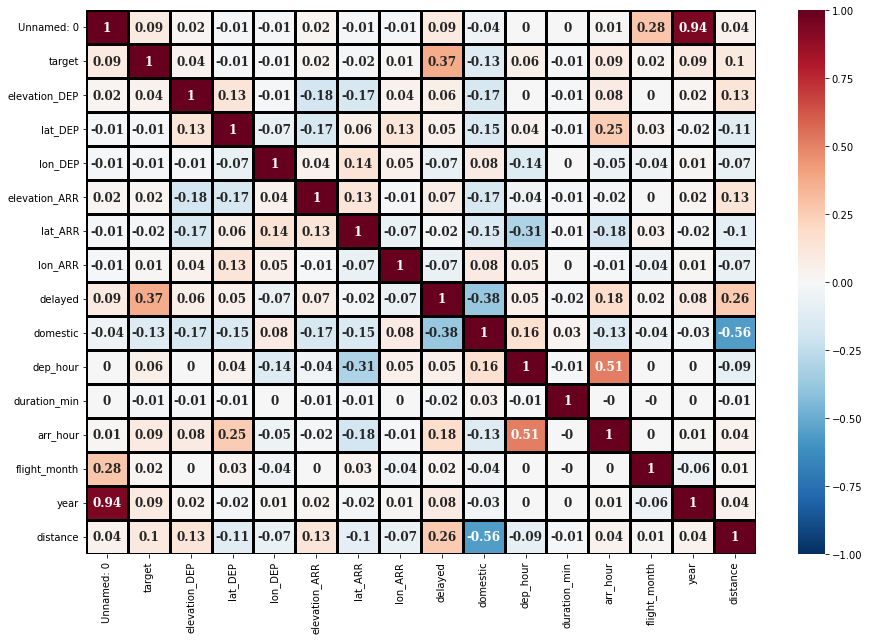

In [3]:
# Heatmap of the Pearson correlation coefficients to see releationships
plt.figure(figsize=(15, 10))
sns.heatmap(
    round(train_df.corr(), 2),
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
    annot=True,
    linewidths=1.1,
    linecolor="black",
    annot_kws={"fontsize": 12, "fontfamily": "serif", "fontweight": "bold"},
);

### Baseline Model